<a href="https://colab.research.google.com/github/alchatman3/IDS/blob/main/HW4Prob1_RandPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Start rmagic to mix Python and R code sells

%load_ext rpy2.ipython

In [2]:
# Import file from computer

from google.colab import files 
uploaded = files.upload()

Saving adultTraining.csv to adultTraining.csv


In [3]:
# Creating a dataframe with the file
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['adultTraining.csv'].decode('utf-8')))
df

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [4]:
# Creating a dataframe with the file in R
%%R

library(readr)
df <- read_csv("adultTraining.csv", show_col_types = FALSE)

In [5]:
# Cross tabulation of Sex and Workclass

crosstab1 = pd.crosstab(df.sex, df.workclass)

print(crosstab1)

workclass    ?  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
sex                                                                           
Female     377          149        377             1     3574            54   
Male       452          305        592             4     6707           444   

workclass  Self-emp-not-inc  State-gov  Without-pay  
sex                                                  
Female                  178        201            1  
Male                    992        385            4  


In [6]:
# Cross tabulation of workclass and sex in R
%%R

r_crosstab <- table(df$workclass, df$sex)

ftable(r_crosstab)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4


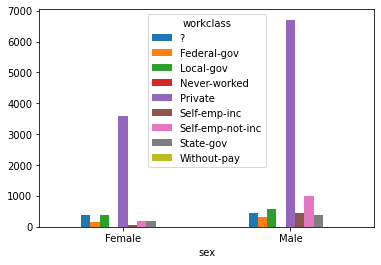

In [9]:
# Creating barplot for Sex and Workclass

# x label rotation
barplot = crosstab1.plot.bar(rot=0)

#Most people for both males and females have a private workclass
#None of them, out of both males and females, never worked

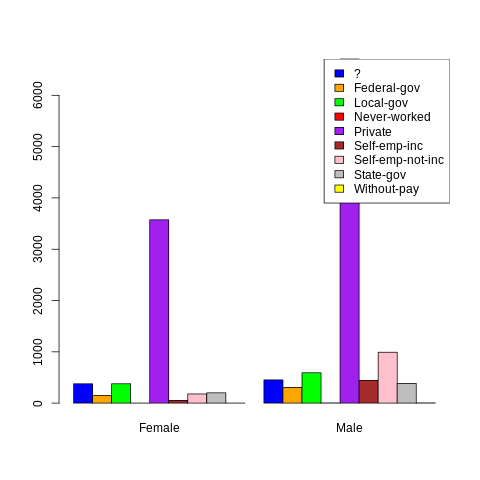

In [10]:
# Creating a barplot for Sex and Workclass in R
%%R

# Colors of the legend
colors <- c("blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "yellow")

barplot(r_crosstab, col = colors, beside = TRUE)
legend("topright", legend = rownames(r_crosstab), fill = colors)

In [11]:
# Cross tabulation of Sex and Marital Status

crosstab2 = pd.crosstab(df.sex, df.maritalStatus)

print(crosstab2)

maritalStatus  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                              
Female             1219                  7                 761   
Male                795                  4                6010   

maritalStatus  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                      
Female                            95           2160        290      380  
Male                             104           2717        182       73  


In [12]:
# Cross tabulation of Sex and Marital Status in R
%%R

r_crosstab2 <- table(df$maritalStatus, df$sex)

ftable(r_crosstab2)

                       Female Male
                                  
Divorced                 1219  795
Married-AF-spouse           7    4
Married-civ-spouse        761 6010
Married-spouse-absent      95  104
Never-married            2160 2717
Separated                 290  182
Widowed                   380   73


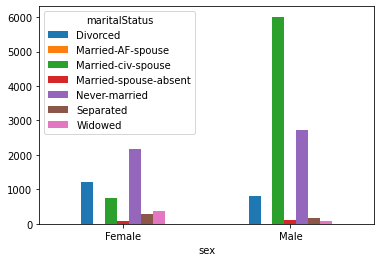

In [14]:
# Creating barplot for Sex and Marital Status

# x label rotation
barplot = crosstab2.plot.bar(rot=0)

#The majority of males are married-civ-spouse
#Most females never married, but more males than females never married
# None, out of both males and females are married-AF-spouse

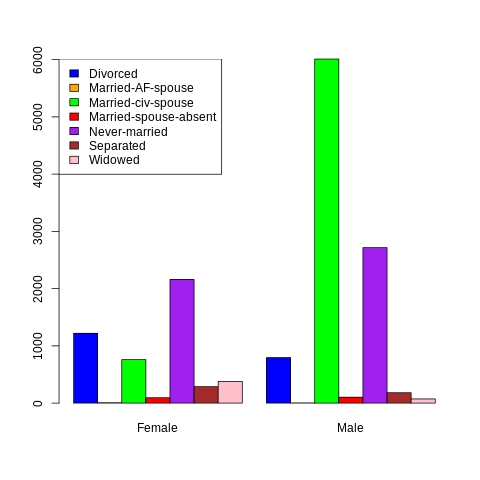

In [15]:
# Creating a barplot for Sex and Marital Status in R
%%R

# Colors of the legend
colors <- c("blue", "orange", "green", "red", "purple", "brown", "pink")

barplot(r_crosstab2, col = colors, beside = TRUE)
legend("topleft", legend = rownames(r_crosstab2), fill = colors)

In [16]:
# Creating a new dataframe for adults over 40

adultOver40 = df[df['age'] > 40]

In [17]:
# Creating a new dataframe from adults over 40 in R
%%R

adultOver40 <- subset(df, age > 40)

In [18]:
# Cross tabulation of Sex and Workclass for adults over 40

crosstab1 = pd.crosstab(adultOver40.sex, adultOver40.workclass)

print(crosstab1)

workclass    ?  Federal-gov  Local-gov  Private  Self-emp-inc  \
sex                                                             
Female     119           83        198     1176            30   
Male       241          191        317     2525           306   

workclass  Self-emp-not-inc  State-gov  Without-pay  
sex                                                  
Female                  114         85            1  
Male                    579        178            1  


In [19]:
# Cross tabulation of workclass and sex for adults over 40 in R
%%R

r_crosstab2 <- table(adultOver40$sex, adultOver40$workclass)

ftable(r_crosstab2)

           ? Federal-gov Local-gov Private Self-emp-inc Self-emp-not-inc State-gov Without-pay
                                                                                              
Female   119          83       198    1176           30              114        85           1
Male     241         191       317    2525          306              579       178           1


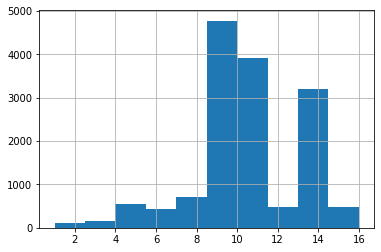

In [21]:
# Creating a histogram of the education attribute

df.education.hist()

# Values of 9 through 11 appear the most for the education attribute

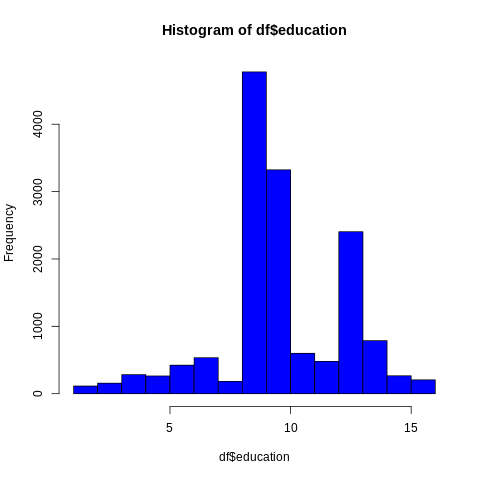

In [22]:
# Creating a histogram of education in R

%%R

hist(df$education, col="blue")

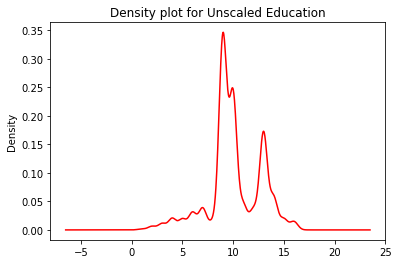

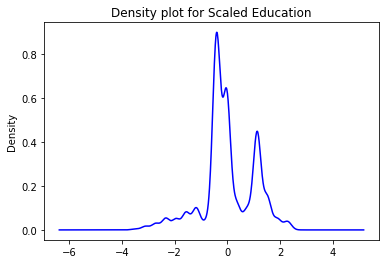

In [24]:
# Creating the scaled and unscaled density plot for education.
from scipy import stats
import matplotlib.pyplot as plt


df['scaled_education'] = stats.zscore(df.education, nan_policy='omit')

df.education.plot.density(color="red")
plt.title('Density plot for Unscaled Education')
plt.show()


df.scaled_education.plot.density(color="blue")
plt.title('Density plot for Scaled Education')
plt.show()

# Values between 8 through 10 have the highest density
# The mean looks to be around 10 or 11

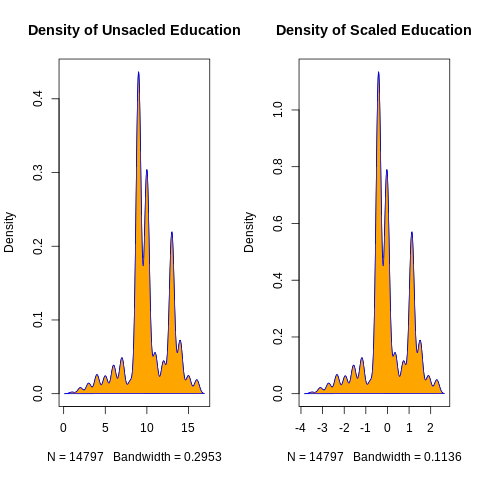

In [25]:
# Creating the scaled and unscaled density plots for education in R
%%R

df$scaled_education <- scale(x = df$education)

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(df$education) 

# plots the results
plot(d1, main="Density of Unsacled Education") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(df$scaled_education) 

# plots the results
plot(d2, main="Density of Scaled Education") 

# plots the results (filled)
polygon(d2, col="orange", border="blue") 

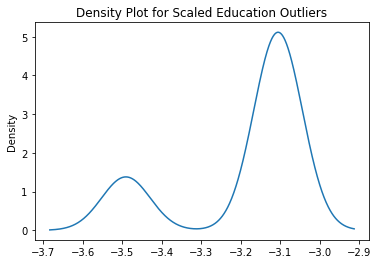

In [27]:
# Determine the outliers using the three sigma rule for the scaled_education attribute

education_outliers = df.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

education_outliers.plot.density()
plt.title('Density Plot for Scaled Education Outliers')
plt.show()

In [28]:
%%R
# Determine the three sigma rule first for the scaled_education attribute

three_sigma_rule <- (df$scaled_education < -3 | 
                     df$scaled_education > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled education values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled education values that are outliers: \n\n")
df$scaled_education[which(three_sigma_rule)]


cat("\n\nThe scaled education values that are NOT outliers: \n\n")
df$scaled_education[which(!three_sigma_rule)]

# There are 113 outliers for the education attribute

There are 113 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

    [1]  1.12812448 -0.41134550 -1.95081548 -0.41134550  1.51299197  0.35838949
    [7] -1.18108049 -1.18108049 -0.02647801 -0.41134550 -0.02647801 -0.02647801
   [13] -0.41134550 -0.02647801 -1.95081548  1.12812448  1.51299197 -0.02647801
   [19] -0.41134550  1.12812448 -0.41134550 -0.02647801  0.35838949  1.12812448
   [25] -0.02647801 -0.02647801 -0.41134550 -0.02647801  1.12812448 -0.02647801
   [31] -0.02647801  0.74325698 -1.18108049  1.12812448 -0.41134550 -0.41134550
   [37] -0.41134550  2.28272696 -0.41134550  1.51299197  1.12812448  1.51299197
   [43] -1.56594799 -1.18108049 -0.41134550 -0.41134550 -0.41134550 -1.95081548
   [49] -0.02647801  0.35838949 -0.41134550  1.12812448  1.12812448  1.12812448
   [55] -0.02647801 -0.02647801  0.74325698  0.74325698 -0.41134550  1.12812448
   [61]  1.51299197  0.35838949 -0.02647801 -0.41134550 -0.02647801 -0.02647801
   

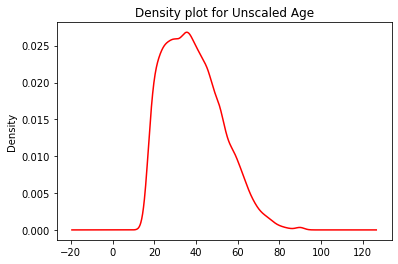

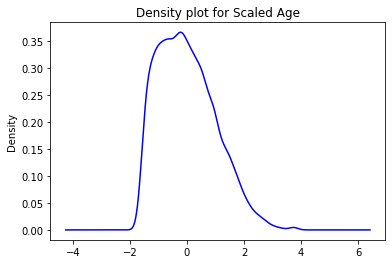

In [31]:
# Creating the scaled and unscaled density plots for the age attribute
from scipy import stats
import matplotlib.pyplot as plt


df['scaled_age'] = stats.zscore(df.age, nan_policy='omit')

df.age.plot.density(color="red")
plt.title('Density plot for Unscaled Age')
plt.show()


df.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()

# Values around the 40s have the highest density

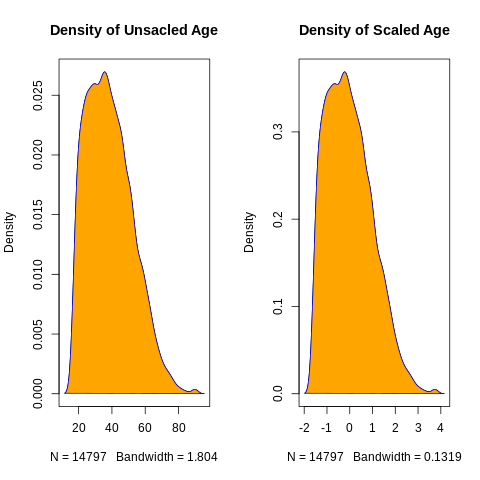

In [32]:
# Creating scaled and unscaled density plots for age in R
%%R

df$scaled_age <- scale(x = df$age)

par(mfrow=c(1, 2))

# Kernel Density Plot
d1 <- density(df$age) 

# plots the results
plot(d1, main="Density of Unsacled Age") 

# plots the results (filled)
polygon(d1, col="orange", border="blue")


# Kernel Density Plot
d2 <- density(df$scaled_age) 

# plots the results
plot(d2, main="Density of Scaled Age") 

# plots the results (filled)
polygon(d2, col="orange", border="blue")

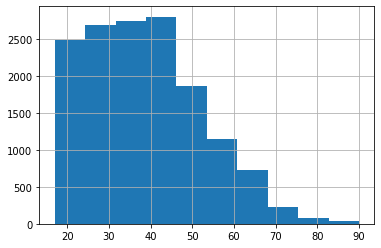

In [34]:
# Creating a histogram for age

df.age.hist()

# Ages 40-45 appear the most

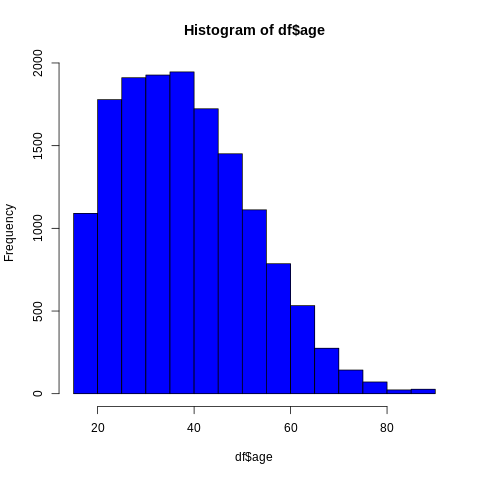

In [35]:
# Creating a histogram of age in R
%%R

hist(df$age, col="blue")

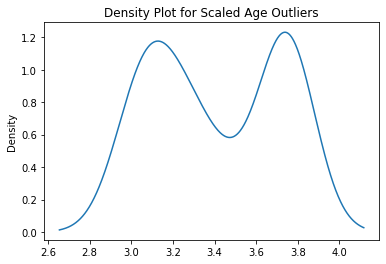

In [36]:
# Determine the outliers using the three sigma rule for the scaled_age attribute

age_outliers = df.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

age_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

In [37]:
%%R
# Determine the three sigma rule first for the scaled_age attribute

three_sigma_rule <- (df$scaled_age < -3 | 
                     df$scaled_age > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 

# The which() command returns the row indices of all such records. 


cat("The scaled age values that are outliers: \n\n")
df$scaled_age[which(three_sigma_rule)]


cat("\n\nThe scaled age values that are NOT outliers: \n\n")
df$scaled_age[which(!three_sigma_rule)]

# There are 60 outliers for the age attribute.
# The most extreme outlier for scaled_age is around -1

There are 60 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

    [1]  0.82700980 -0.05025535  0.75390437  0.97322066 -0.56199336  0.09595551
    [7] -0.05025535  0.31527180  1.11943152  0.02285008 -0.63509878 -1.29304765
   [13] -1.43925851 -0.56199336 -0.56199336 -1.07373136  0.38837722 -1.00062593
   [19] -1.51236393  0.82700980  0.60769351  0.31527180 -0.26957164 -0.63509878
   [25] -0.70820421 -0.78130964  1.04632609 -1.00062593 -0.56199336 -1.14683679
   [31]  2.94706725  0.09595551 -1.51236393  0.97322066  1.48495866  0.38837722
   [37]  0.75390437  0.31527180 -0.48888793  2.72775096  0.38837722  0.60769351
   [43] -1.58546936 -0.63509878 -0.56199336  0.24216637 -0.19646621  1.04632609
   [49]  1.26564237  0.75390437 -1.21994222  0.09595551 -0.63509878 -0.70820421
   [55] -1.43925851 -1.36615308 -0.56199336 -0.78130964 -1.07373136 -0.12336078
   [61] -0.05025535 -0.85441507  0.75390437  1.63116952 -0.85441507 -1.43925851
   [

In [39]:
# Creating a new datsframe with adult over 80
adultOver80 = df[df['age'] > 80]

In [40]:
# Creating a new dataframe with adults over 80 in R
%%R

adultOver80 <- subset(df, age > 80)

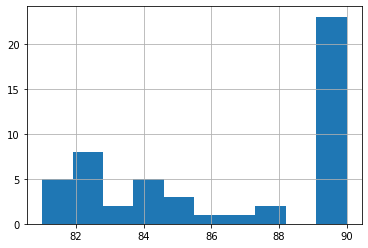

In [43]:
# Creating a histogram of age for adults over 80

adultOver80.age.hist()
# Ages of 89 or 90 appear the most for the age sttribute for adults over 80
# Ages of about 85-87 appear the least

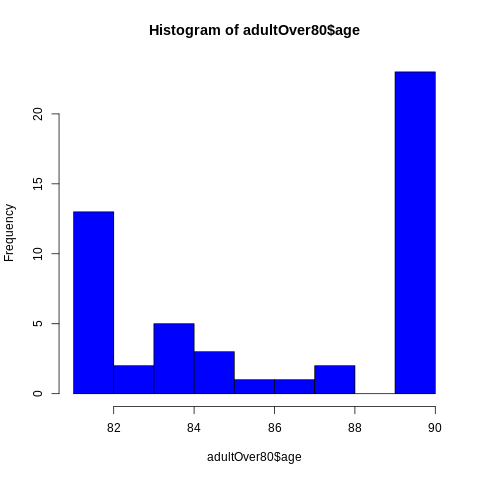

In [42]:
# Creating a histogram of age for adults over 80 in R

%%R

hist(adultOver80$age, col="blue")